# Steel City Data Crunchers!
## Metric: Money Making Potential
There are no things in life more important than money. So, it makes sense to judge Pittsburgh's neighborhoods solely on their potential to make their inhabitants wealthy! We've broken our metric into four submetrics. Here they are alongside their correlation with money making potential:
- Income (positively correlated)
- Education Attainment (positively correlated)
- Crime Level (negatively correlated)
- Public Transit Efficacy (positively correlated)

![](https://i.imgur.com/h9E4leA.jpg)

### Income
Not much needs to be said here! Clearly, neighborhoods with high average income indicate that the moneymaking potential is high. Additionally, it's better to start new businesses in areas with high income since there's more money to go around. We choose the neighborhood with the highest average income as the best neighborhood with respect to income

[Aggregate Household Income In The Past 12 Months Dataset](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/34842307-0da6-458a-9df3-a09ab3e3a489)

### Education Attainment
Statistically speaking, the best level of education for maximizing income is masters level. This is because PhD's typically go on to work in universities where they are underpaid as professors. Masters are more specialized and skilled than Bachelors, but they stick to industry where the real money is. So we choose the neighborhood with the best level of masters degree attainment as the best neighborhood with respect to education.

[Educational Attainment for the Population 25 Years and Over Dataset](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/12535b2e-6180-4cdf-b7d8-ec5294259e49)

###  Crime Count
Everybody knows that violent crime scares away rich people. Additionally, it's hard to stay rich when you keep getting robbed of all your money :(. Most of all, a low crime count is integral to money-making. According to Maslow's hierarchy of needs, one cannot be motivated to make money without first having both physical and psychological safety. Hence, we made crime count a factor when choosing the best neighborhood.

![](https://i.imgur.com/fXcvTDx.png)

[Police Incident Blotter (30 Day) Dataset](https://data.wprdc.org/dataset/police-incident-blotter)

### Public Transit
It's hard to get to your 300k/year software engineering job when the bus doesn't come on time. So we choose the neighborhood with the highest PT efficacy as the best neighborhood with respect to public transit.

[Monthly OTP by Route Dataset](https://data.wprdc.org/dataset/port-authority-monthly-average-on-time-performance-by-route/resource/00eb9600-69b5-4f11-b20a-8c8ddd8cfe7a)

We will now go through each of these submetrics, starting with public

# Public Transit

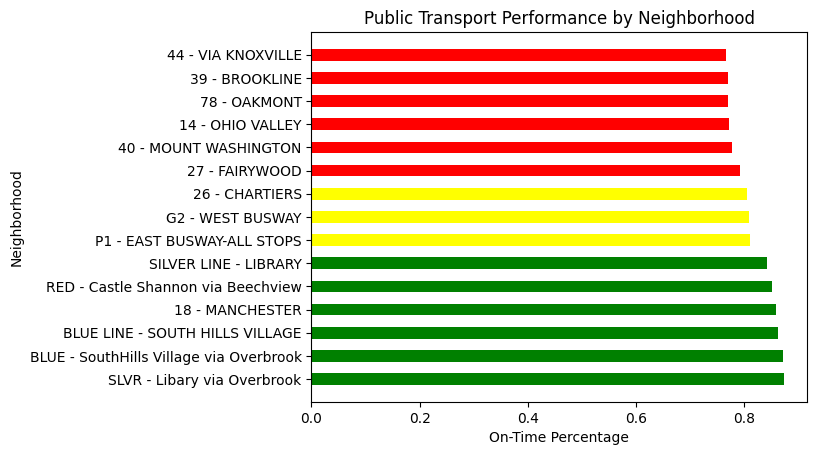

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/bus.csv")

grouped = df.groupby('route_full_name')['on_time_percent'].mean().nlargest(15).reset_index()

colors = []
for percentage in grouped['on_time_percent']:
    if percentage >= 0.82:
        colors.append('green')
    elif percentage >= 0.8:
        colors.append('yellow')
    else:
        colors.append('red')

plt.figure()
plt.barh(grouped['route_full_name'], grouped['on_time_percent'], color=colors, height = .5)

plt.title('Public Transport Performance by Neighborhood')
plt.xlabel('On-Time Percentage')
plt.ylabel('Neighborhood')

plt.show()


### Conclusion
In relation to public transport, there are several reason why we have concluded that Friendship is the best neighborhood in Pittsburgh. Although it is not in the top 15 for transit, it is adjacent to shady side which does have access to fast light rail system. Furthermore, Friendship is above average in the percentage its buses are on time, being at around 75%. The neighborhood I thought would be the best for our metric was Downtown, because I figured that is where the most money in Pittsburgh woul dbe centralized, so the most money making potential would also be there. That being said, Friendship by our metrics is the best neighborhood for money making potential.

# Crime Count

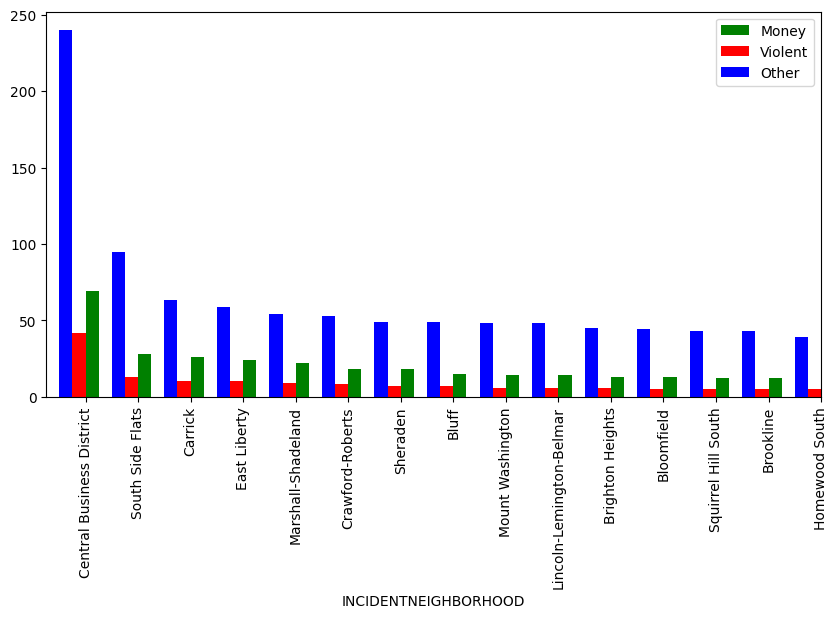

In [9]:
data = pd.read_csv("datasets/crime.csv")
crime_count = data["INCIDENTNEIGHBORHOOD"].value_counts()

# The violent crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
violent_crimes = ['AGG-ASSAULT', 'AGG. INDECENT ASSAULT W/ UNCONSCIOUS PERSON', 'CRIMINAL HOMICIDE', 'INDECENT ASSAULT',
                  'RAPE', 'RECKLESSLY ENDANGER ANOTH PER', 'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'SEXUAL ASSAULT', 'SIMPLE ASSAULT']
violent_data = data[data["INCIDENTHIERARCHYDESC"].isin(violent_crimes)]
violent_crime_count = violent_data["INCIDENTNEIGHBORHOOD"].value_counts()

# The money crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
money_crimes = ['BAD CHECKS', 'BURGLARY', 'CREDIT CARDS', 'FORGERY', 'FOUND PROPERTY', 'GAMBLING INVESTIGATION', 'LOST PROPERTY', 'RECEIVING STOLEN PROPERTY',
                'RETSIL THEFT (SHOPLIFTING)', 'STOLEN PROPERTY - OTHER', 'THEFT', 'THEFT BY DECEPTION', 'THEFT BY EXTORTION', 'THEFT FROM AUTO', 'THEFT OF SERVICES']
money_data = data[data["INCIDENTHIERARCHYDESC"].isin(money_crimes)]
money_crime_count = money_data["INCIDENTNEIGHBORHOOD"].value_counts()

other_data = data[~data["INCIDENTHIERARCHYDESC"].isin(violent_crimes + money_crimes)]
other_crime_count = other_data["INCIDENTNEIGHBORHOOD"].value_counts()


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

money_crime_count.nlargest(15).plot(kind='bar', color='green', ax=ax, width=0.25, position=0)
violent_crime_count.nlargest(15).plot(kind='bar', color='red', ax=ax, width=0.25, position=1)
other_crime_count.nlargest(15).plot(kind='bar', color='blue', ax=ax, width=0.25, position=2)

ax.legend(["Money", "Violent", "Other"])
plt.xticks(rotation=90)
plt.show()

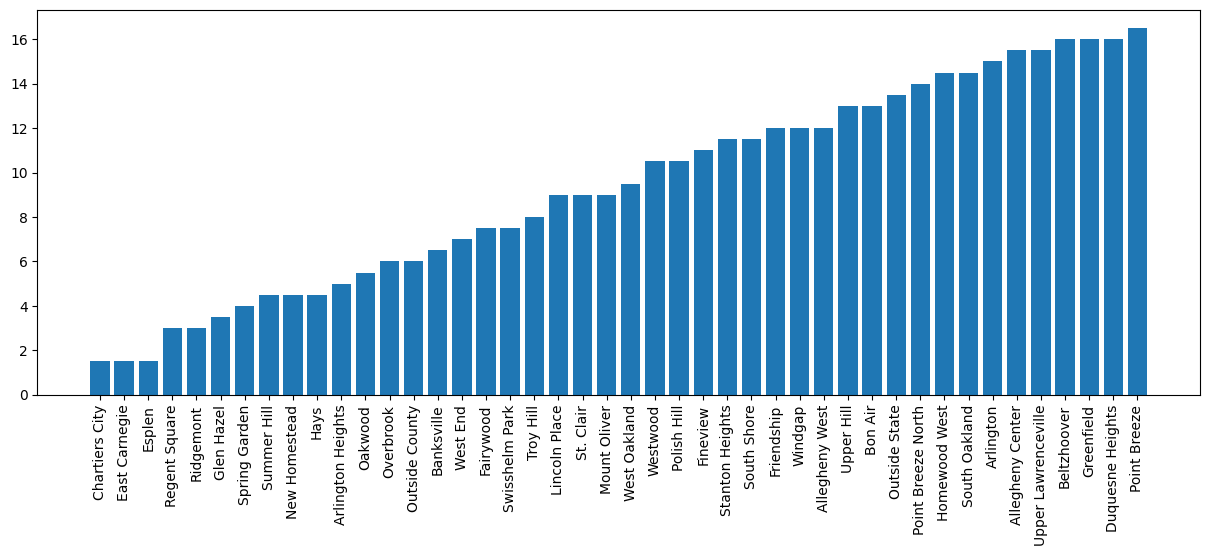

In [40]:
weighted_crimes = crime_count.to_dict()
for k, v in violent_crime_count.items():
    weighted_crimes[k] = v * 1
for k, v in money_crime_count.items():
    weighted_crimes[k] += v * 2
for k, v in other_crime_count.items():
    weighted_crimes[k] += v * 0.5

weighted_crime_count = pd.Series(weighted_crimes)

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

plt.bar(weighted_crime_count.nsmallest(44).index, weighted_crime_count.nsmallest(44).values)
plt.xticks(rotation=90)
plt.show()

### Conclusion

Going purely by the metric of crime level, the best neighborhood in Pittsburgh would have to be one of either Charitiers, East Carnegie, or Esplen, which all had a weighted crime count of 1.5. However, this is not a accurate metric to go by since it doesn't account for population density. So going by a purely data driver approach won't be enough in this case.

As previously mentioned, the reason we chose this submetric was because an integral part of money-making is basic physical and psychological safety (as stated by Maslow's Hierarchy of Needs). Therefore, the best neighborhood doesn't need to be absolutely safe, just safe enough that one can be comfortable. So, I decided to use my personal favorite neighbourhood, Point Breeze, as the best neighbourhood for this submetric. It has a weighted crime count of 16.5 and is the neighbourhood with the 44th lowest weighted crime count.

I have not been to many neighbourhoods in Pittsburgh, and of the ones I've been to, I couldn't name 90% of them. However, Point Breeze is my favorite because of its vibe. And you know what contributes to the vibe? Safety. So, while the data driven approach may not tell me what the best neighbourhood is, it does tell me what the best neighbourhood could be.

I could have just as easily chosen another neighbourhood such as Friendship or South Shore, which both have lower weighted crime counts. I'm saying this to emphasize that this submetric will be used as an exclusionary one. If the crime count is too high, we won't consider the neighbourhood when choosing our best overall neighbourhood.

# Education Attainment

In [6]:
edu = pd.read_csv("datasets/educational.csv")
edu.head(10)
total_count = "Estimate; Total:"
highschool_count = "Estimate; Total: - Regular high school diploma"
undergrad_count = "Estimate; Total: - Bachelor's degree"
graduate_count = "Estimate; Total: - Master's degree"


edu["hs_ratio"] =  (edu[highschool_count] / edu[total_count]) * 100
edu["undergrad_ratio"] =  (edu[undergrad_count] / edu[total_count]) * 100
edu["graduate_ratio"] =  (edu[graduate_count] / edu[total_count]) * 100



max_hs = edu["hs_ratio"].idxmax()
max_undergrad = edu["undergrad_ratio"].idxmax()
max_graduate = edu["graduate_ratio"].idxmax()
# Now to get the names of the neighborhoods based on the ids of the maximum values
# usage of loc: df.loc[row_indexer,column_indexer]
max_hs_name = edu.loc[max_hs, "Neighborhood"]
max_undergrad_name = edu.loc[max_undergrad, "Neighborhood"]
max_graduate_name = edu.loc[max_graduate, "Neighborhood"]

# printing the final results
print("Neighborhood known max HS graduation attainment ")
print(max_hs_name)
print("Result:")
print(edu.loc[max_hs, "hs_ratio"])
print()
print("Neighborhood known max undergrad education attainment ")
print(max_undergrad_name)
print("Result:")
print(edu.loc[max_undergrad, "undergrad_ratio"])
print()
print("Neighborhood known max graduate education attainment ")
print(max_graduate_name)
print("Result:")
print(edu.loc[max_graduate, "graduate_ratio"])
print()


Neighborhood known max HS graduation attainment 
Knoxville
Result:
44.83454398708636

Neighborhood known max undergrad education attainment 
Strip District
Result:
41.52046783625731

Neighborhood known max graduate education attainment 
Friendship
Result:
33.31085637221848



### Analysis of results
Luckly, I checked in on these districts to make sure that the results were reasonable. First run, I got:
Chateau
Strip District
South Shore
Turns out the results weren't accurate. Only 8 poeple from south shore filled out this form, and only 3 people from Chateau. 

Finally, I got Friendship as the neighborhood with the highest ratio of people whom attained a graduate education as their highest level. around 1400 people from friendship filled out this survey, and 33% of them attained a graduate degree as their highest level of education! Additionally, around 25% of people from Friendship attained a bachelors degree. If we sum this, we get 58% of people had HS or masters as their highest education level.

Looking at Strip District, we have that 41% of people attained an undergrad education, and around 17% of people went on to gain a masters education. So if we sum this, 58% of people either had HS or masters as highest education level. 

We have that both Friendship and Strip District had 58% of people finishing either HS or undergraduate education! Knowing only that, we'd place Friendship in the lead since it has more college graduates. But, if Strip District has enough Doctorate students, it might be enough to make up for the loss! Strip District has about 7% of people having a doctorate as their highest educational attainment, whereas Friendship has 9%. So, clearly, Friendship beats out Strip District on education. 


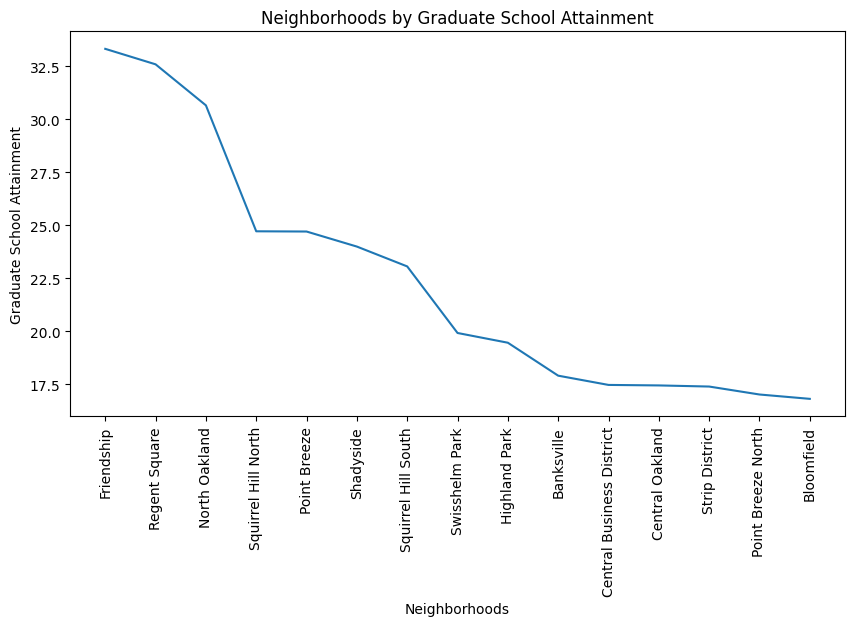


Top 15 Neighborhoods based on Graduate School Attainment
1 Friendship
2 Regent Square
3 North Oakland
4 Squirrel Hill North
5 Point Breeze
6 Shadyside
7 Squirrel Hill South
8 Swisshelm Park
9 Highland Park
10 Banksville
11 Central Business District
12 Central Oakland
13 Strip District
14 Point Breeze North
15 Bloomfield


In [7]:
sorted_edu = edu.sort_values(by="graduate_ratio", ascending=False)
#print(sorted_edu["graduate_ratio"])
ratio_sorted = sorted_edu["graduate_ratio"].to_list()
nbh_by_graduate = sorted_edu["Neighborhood"]
nbh_by_graduate = nbh_by_graduate.to_list()

top_15_neighborhoods = nbh_by_graduate[:15]

top_15_ratios = ratio_sorted[:15]

plt.figure(figsize=(10, 5))
plt.plot(top_15_neighborhoods, top_15_ratios)
plt.xlabel('Neighborhoods')
plt.ylabel('Graduate School Attainment')
plt.title('Neighborhoods by Graduate School Attainment')
plt.xticks(rotation='vertical')
plt.show()


print()
print("Top 15 Neighborhoods based on Graduate School Attainment")
for i in range(15):
    print(str(i + 1) + " " + nbh_by_graduate[i])

### Conclusion
We can conclude that based on the data provided, the best neighborhood based on education is Friendship! In order to compare with other submetrics, I sorted based solely on graduate level, giving this list of 15 neighborhoods.

# INCOME

# Introduction

**The** project I have chosen is about the household income situation in different communities throughout Pittsburgh, and I will select the communities with the highest income from them. 

**The** data I used comes from a 2015 community survey of the entire city of Pittsburgh, which will include the income situation of households in different communities within the 12 months at that time

# The Metric

**My** measurement standard is monthly income, and the unit of income I measure is in US dollars. 

The dataset I use mainly includes 

* The total income of each month

* Income with wages

* Income without wages 

* And the Margin of error of each of them

# The Best Neighborhood

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('wage-or-salary-income-in-the-past-12-months-for-households.csv')
maxClm = data['Estimate; Total:'].max()
print("Maximum value in column 'Estimate; Total': ")
print(maxClm)

max_x = data.loc[data['Estimate; Total:'].idxmax()]
print ("Maximum value of ", "Estimate Total", " and its all values:\n", max_x)

Maximum value in column 'Estimate; Total': 
7484.0
Maximum value of  Estimate Total  and its all values:
 Neighborhood                                             Shadyside
Id                                                              69
Estimate; Total:                                            7484.0
Margin of Error; Total:                                 360.919659
Estimate; Total: - With wage or salary income               6134.0
Margin of Error; Total: - With wage or salary income    363.641307
Estimate; Total: - No wage or salary income                 1350.0
Margin of Error; Total: - No wage or salary income       210.56353
Name: 68, dtype: object


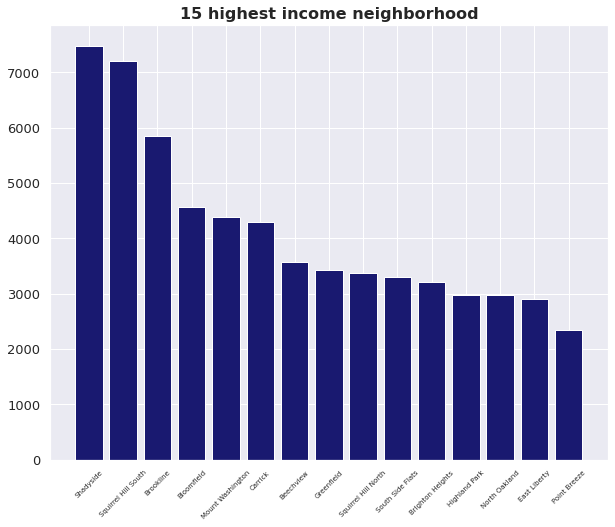

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
sns.set()

data = pd.read_csv('wage-or-salary-income-in-the-past-12-months-for-households.csv')
dt = data.sort_values(by = "Estimate; Total:", ascending  = False).head(15)
plt.figure(figsize=(10,8))
plt.bar(x=dt['Neighborhood'],
        height=dt['Estimate; Total:'],
        color='midnightblue')
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=13)
plt.title('15 highest income neighborhood',fontsize=16,fontweight='bold')
plt.savefig('highest.png')

**These** are the 15 highest income neighborhood in Pittsburgh

# Conclusion

**The final result indicates that Shadyside is the community with the highest income in Pittsburgh, which is basically in line with my expectations, as compared to other communities, such as my favorite, , this community has various high-end boutiques, well-known brand specialty stores and specialty grocery stores, antique shops, and home accessory stores; There are also various bars and snack bar at night, which further proves that the industrial chain and service chain owned by this community are more abundant, thus providing more employment opportunities.**